In [1]:
%load_ext autoreload
# change import path 
import sys
sys.path.append('../../src')

In [2]:
from preprocessing.pre_processor import PreProcessor

In [3]:
# import roberta tokeizer fast
from transformers import RobertaTokenizerFast

# import torch
import torch

In [4]:
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

batch_size = 2
num_sentences = 24
max_sentence_length = 64
max_args_per_sentence = 10
max_arg_length = 16 
test_size = 0.1
frameaxis_dim = 10
name_tokenizer = 'roberta-base'
path_name_bert_model = 'roberta-base'
path_antonym_pairs = '../../data/axis/mft.json'
dim_names = ["virtue","vice"]
class_column_names = "Capacity and Resources;Crime and Punishment;Cultural Identity;Economic;External Regulation and Reputation;Fairness and Equality;Health and Safety;Legality, Constitutionality, Jurisdiction;Morality;Other;Policy Prescription and Evaluation;Political;Public Sentiment;Quality of Life;Security and Defense".split(";")

In [5]:
# Preprocess the input
preprocessor = PreProcessor(
    tokenizer,
    batch_size=batch_size,
    max_sentences_per_article=num_sentences,
    max_sentence_length=max_sentence_length,
    max_args_per_sentence=max_args_per_sentence,
    max_arg_length=max_arg_length,
    test_size=test_size,
    frameaxis_dim=frameaxis_dim,
    bert_model_name=name_tokenizer,
    name_tokenizer=name_tokenizer,
    path_name_bert_model=path_name_bert_model,
    path_antonym_pairs=path_antonym_pairs,
    dim_names=dim_names,
    class_column_names=class_column_names,
)

In [6]:
df = preprocessor._load_data("../../data/mfc/immigration_labeled_preprocessed.json",
    "json",)

In [7]:
class_column_names = df.columns[3:]

In [8]:
class_column_names, len(class_column_names)

(Index(['Capacity and Resources', 'Crime and Punishment', 'Cultural Identity',
        'Economic', 'External Regulation and Reputation',
        'Fairness and Equality', 'Health and Safety',
        'Legality, Constitutionality, Jurisdiction', 'Morality', 'Other',
        'Policy Prescription and Evaluation', 'Political', 'Public Sentiment',
        'Quality of Life', 'Security and Defense'],
       dtype='object'),
 15)

In [9]:
# Creating y_subset
y_subset = (
    df.groupby("article_id")[class_column_names]
    .apply(lambda x: x.values.tolist())
    .reset_index(name="encoded_values")
)


In [10]:
# find rows which have all zeros

y_subset["encoded_values"].apply(lambda x: x[0].index(1))

0       13
1        7
2        0
3       13
4        7
        ..
5927    11
5928     0
5929    12
5930    11
5931     1
Name: encoded_values, Length: 5932, dtype: int64

In [11]:
random_state = 42

In [12]:
class_freq_dict = {
                "Capacity and Resources": 0.035401,
                "Crime and Punishment": 0.135367,
                "Cultural Identity": 0.093729,
                "Economic": 0.069791,
                "External Regulation and Reputation": 0.022252,
                "Fairness and Equality": 0.026129,
                "Health and Safety": 0.040290,
                "Legality, Constitutionality, Jurisdiction": 0.161328,
                "Morality": 0.012812,
                "Other": 0.001517,
                "Policy Prescription and Evaluation": 0.079737,
                "Political": 0.163351,
                "Public Sentiment": 0.040964,
                "Quality of Life": 0.069117,
                "Security and Defense": 0.048213,
            }

In [13]:
train_df, test_df = preprocessor.get_dataframe(
    "../../data/mfc/immigration_labeled_preprocessed.json",
    "json",
    dataframe_path={
        "srl": "../../data/srls/mfc/mfc_labeled.pkl",
        "frameaxis": "../../data/frameaxis/mfc/frameaxis_mft.pkl",
    },
    force_recalculate={
        "srl": False,
        "frameaxis": False,
    },
    random_state=random_state,
    class_freq_dict=class_freq_dict,
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
train_df.head(2)

,article_id,text,srl_values,frameaxis_values,encoded_values
0,Immigration1.0-64046,"[California Eases Tone As Latinos Make Gains.,...","[[{'predicate': 'Make', 'ARG0': 'Latinos', 'AR...","[[0.06492993608117104, 0.002146522296656975, 0...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]..."
1,Immigration1.0-6998,[METRO NEWS BRIEFS: NEW JERSEY; Man Gets 22 Mo...,"[[{'predicate': 'Gets', 'ARG0': 'Man', 'ARG1':...","[[0.03893197948733965, 0.0018980531230684747, ...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."


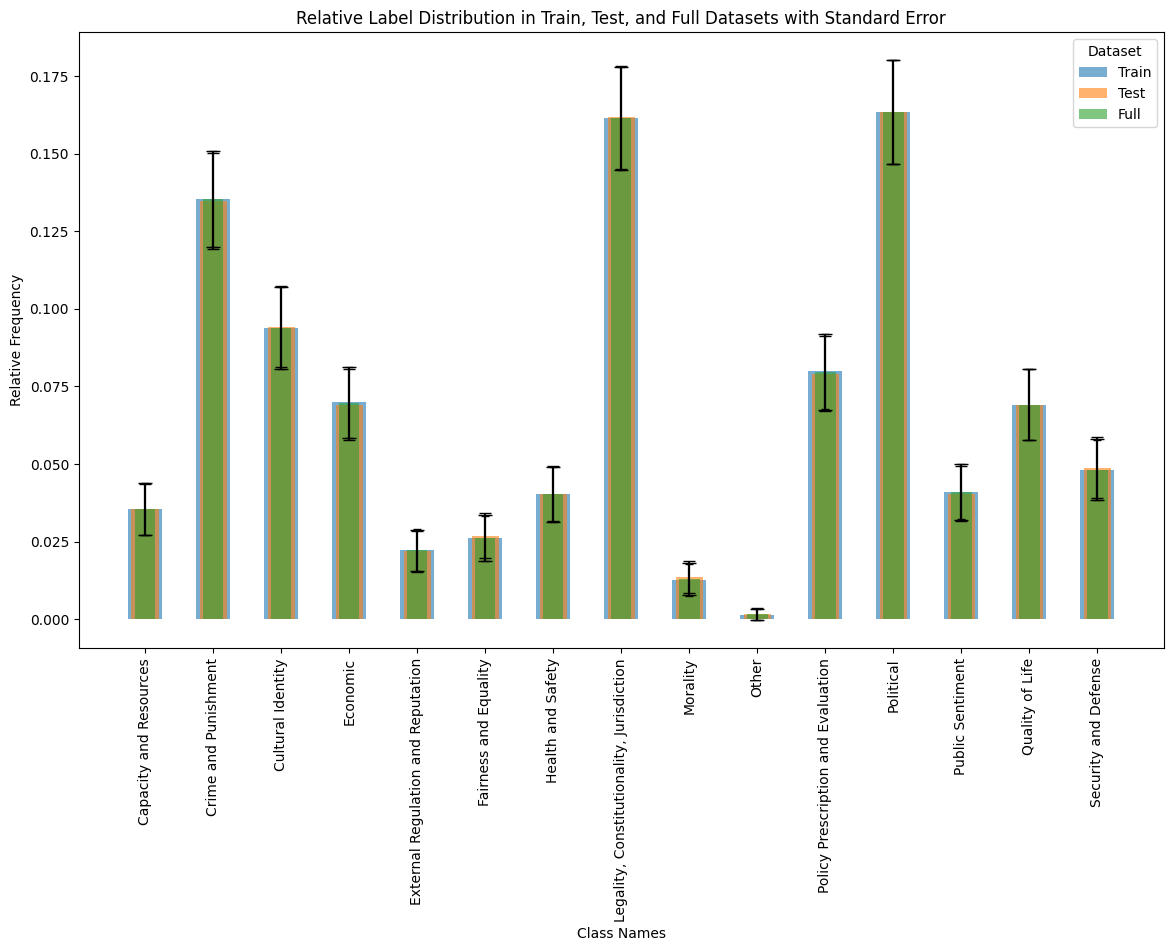

                                              Train      Test      Full  \
label_name                                                                
Capacity and Resources                     0.035407  0.035354  0.035401   
Crime and Punishment                       0.135444  0.134680  0.135367   
Cultural Identity                          0.093668  0.094276  0.093729   
Economic                                   0.069876  0.069024  0.069791   
External Regulation and Reputation         0.022293  0.021886  0.022252   
Fairness and Equality                      0.026040  0.026936  0.026129   
Health and Safety                          0.040277  0.040404  0.040290   
Legality, Constitutionality, Jurisdiction  0.161296  0.161616  0.161328   
Morality                                   0.012739  0.013468  0.012812   
Other                                      0.001499  0.001684  0.001517   
Policy Prescription and Evaluation         0.079805  0.079125  0.079737   
Political                

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#
# Function to get label distribution
def get_label_distribution(df, class_names):
    # Extract labels using argmax
    df['label'] = df['encoded_values'].apply(lambda x: np.argmax(x))
    # Map labels to class names
    df['label_name'] = df['label'].apply(lambda x: class_names[x])
    # Get distribution
    distribution = df['label_name'].value_counts().sort_index()
    return distribution

# Get distributions for train, test, and full datasets
train_distribution = get_label_distribution(train_df, class_column_names)
test_distribution = get_label_distribution(test_df, class_column_names)

# Concatenate train and test datasets for full dataset
full_df = pd.concat([train_df, test_df])
full_distribution = get_label_distribution(full_df, class_column_names)

# Calculate relative frequencies
train_relative = train_distribution / train_distribution.sum()
test_relative = test_distribution / test_distribution.sum()
full_relative = full_distribution / full_distribution.sum()

# Combine into a single DataFrame
relative_df = pd.DataFrame({
    'Train': train_relative,
    'Test': test_relative,
    'Full': full_relative
}).fillna(0)

# Calculate standard error
se_df = np.sqrt(
    train_relative * (1 - train_relative) / len(train_df) + 
    test_relative * (1 - test_relative) / len(test_df) +
    full_relative * (1 - full_relative) / len(full_df)
)

# Plot the relative distribution with error bars
plt.figure(figsize=(14, 8))
plt.bar(relative_df.index, relative_df['Train'], alpha=0.6, label='Train', yerr=se_df, capsize=3, width=0.5)
plt.bar(relative_df.index, relative_df['Test'], alpha=0.6, label='Test', yerr=se_df, capsize=4, width=0.4)
plt.bar(relative_df.index, relative_df['Full'], alpha=0.6, label='Full', yerr=se_df, capsize=5, width=0.3)
plt.title('Relative Label Distribution in Train, Test, and Full Datasets with Standard Error')
plt.xlabel('Class Names')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=90)
plt.legend(title='Dataset')
plt.show()

# Display the relative distribution and standard error table
relative_df['SE'] = se_df
print(relative_df)

In [43]:
relative_df['Full']

label_name
Capacity and Resources                       0.035401
Crime and Punishment                         0.135367
Cultural Identity                            0.093729
Economic                                     0.069791
External Regulation and Reputation           0.022252
Fairness and Equality                        0.026129
Health and Safety                            0.040290
Legality, Constitutionality, Jurisdiction    0.161328
Morality                                     0.012812
Other                                        0.001517
Policy Prescription and Evaluation           0.079737
Political                                    0.163351
Public Sentiment                             0.040964
Quality of Life                              0.069117
Security and Defense                         0.048213
Name: Full, dtype: float64

## Test

In [57]:
from utils.focal_loss import focal_loss, FocalLoss

In [66]:
class_freq_dict = {
    "Capacity and Resources": 0.035401,
    "Crime and Punishment": 0.135367,
    "Cultural Identity": 0.093729,
    "Economic": 0.069791,
    "External Regulation and Reputation": 0.022252,
    "Fairness and Equality": 0.026129,
    "Health and Safety": 0.040290,
    "Legality, Constitutionality, Jurisdiction": 0.161328,
    "Morality": 0.012812,
    "Other": 0.001517,
    "Policy Prescription and Evaluation": 0.079737,
    "Political": 0.163351,
    "Public Sentiment": 0.040964,
    "Quality of Life": 0.069117,
    "Security and Defense": 0.048213,
}

# Convert dictionary to list of frequencies
class_freqs = list(class_freq_dict.values())


In [70]:
# Test 1: Using normal frequencies
alpha_normal = torch.tensor(class_freqs)
focal_loss_normal = FocalLoss(alpha=alpha_normal, gamma=2.5, reduction='sum')

# Test 2: Using inverse normalized frequencies
alpha_inverse = torch.tensor([torch.sqrt(torch.tensor(1.0 / torch.tensor(freq)) for freq in class_freqs])
alpha_inverse_normalized = alpha_inverse / alpha_inverse.sum()
focal_loss_inverse = FocalLoss(alpha=alpha_inverse_normalized, gamma=2.5, reduction='sum')

In [71]:
# Create some mock data
batch_size = 64
num_classes = len(class_freqs)
mock_predictions = torch.randn(batch_size, num_classes)
mock_targets = torch.randint(0, num_classes, (batch_size,))

# Test both loss functions
loss_normal = focal_loss_normal(mock_predictions, mock_targets)
loss_inverse = focal_loss_inverse(mock_predictions, mock_targets)

print(f"Loss with normal frequencies: {loss_normal.item():.4f}")
print(f"Loss with inverse normalized frequencies: {loss_inverse.item():.4f}")

# Additional test to see how the losses change for different classes
for i in range(num_classes):
    single_class_target = torch.full((batch_size,), i, dtype=torch.long)
    loss_normal_single = focal_loss_normal(mock_predictions, single_class_target)
    loss_inverse_single = focal_loss_inverse(mock_predictions, single_class_target)
    
    print(f"\nClass {i} ({list(class_freq_dict.keys())[i]}):")
    print(f"  Normal freq loss: {loss_normal_single.item():.4f}")
    print(f"  Inverse norm freq loss: {loss_inverse_single.item():.4f}")

Loss with normal frequencies: 12.0378
Loss with inverse normalized frequencies: 15.4396

Class 0 (Capacity and Resources):
  Normal freq loss: 7.0102
  Inverse norm freq loss: 11.7896

Class 1 (Crime and Punishment):
  Normal freq loss: 23.8667
  Inverse norm freq loss: 5.3681

Class 2 (Cultural Identity):
  Normal freq loss: 13.9476
  Inverse norm freq loss: 5.4448

Class 3 (Economic):
  Normal freq loss: 12.6899
  Inverse norm freq loss: 7.7100

Class 4 (External Regulation and Reputation):
  Normal freq loss: 4.0694
  Inverse norm freq loss: 13.7333

Class 5 (Fairness and Equality):
  Normal freq loss: 4.9220
  Inverse norm freq loss: 13.0543

Class 6 (Health and Safety):
  Normal freq loss: 7.2986
  Inverse norm freq loss: 10.1097

Class 7 (Legality, Constitutionality, Jurisdiction):
  Normal freq loss: 30.8049
  Inverse norm freq loss: 5.3254

Class 8 (Morality):
  Normal freq loss: 2.2159
  Inverse norm freq loss: 17.1166

Class 9 (Other):
  Normal freq loss: 0.2738
  Inverse nor

In [72]:
2500 / 150

16.666666666666668

In [73]:
16.666 / 64

0.26040625

In [75]:
2500 / (64)

39.0625